<a href="https://colab.research.google.com/github/Saul-Ochoa/RepositorioUPC/blob/main/Simulaci%C3%B3n_UPC_GERENCIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autor Saúl Kevin Ochoa Salazar**

# **Codigo u201911664**

## Libreria

In [ ]:
pip install simpy

## Codigo

In [15]:
import random
import simpy
import matplotlib.pyplot as plt
import statistics


simulacion_riesgos = [
    {
        'codigo': 'RIES-01',
        'presupuesto_minimo': 3504,
        'presupuesto_real': 8500,
        'presupuesto_maximo': 7442,
    },
    {
        'codigo': 'RIES-02',
        'presupuesto_minimo': 1230,
        'presupuesto_real': 5050,
        'presupuesto_maximo': 4300,
    },
    {
        'codigo': 'RIES-03',
        'presupuesto_minimo': 1233,
        'presupuesto_real': 10500,
        'presupuesto_maximo': 4311,
    },
    {
        'codigo': 'RIES-04',
        'presupuesto_minimo': 1113,
        'presupuesto_real': 3800,
        'presupuesto_maximo': 2900,
    },
    {
        'codigo': 'RIES-05',
        'presupuesto_minimo': 475,
        'presupuesto_real': 8250,
        'presupuesto_maximo': 731,
    },
    {
        'codigo': 'RIES-06',
        'presupuesto_minimo': 2388,
        'presupuesto_real': 5500,
        'presupuesto_maximo': 4500,
    }
]


def simulacion(env, presupuesto_minimo, presupuesto_real, presupuesto_maximo):
    for riesgo in simulacion_riesgos:
        presupuesto_minimo += riesgo['presupuesto_minimo']
        presupuesto_real += riesgo['presupuesto_real']
        presupuesto_maximo += riesgo['presupuesto_maximo']


        distribucion = (riesgo['presupuesto_maximo'] - riesgo['presupuesto_minimo']) / 6
        presupuesto_simulado = random.uniform(riesgo['presupuesto_minimo'], riesgo['presupuesto_maximo'])
        presupuesto_real += presupuesto_simulado

    return presupuesto_minimo, presupuesto_real, presupuesto_maximo


num_simulaciones = 1000
resultados_presupuesto = []

for _ in range(num_simulaciones):
    random.seed()
    env = simpy.Environment()
    presupuesto_minimo = 25242.3
    presupuesto_real = 0
    presupuesto_maximo = 0
    presupuesto_minimo, presupuesto_real, presupuesto_maximo = simulacion(env, presupuesto_minimo, presupuesto_real, presupuesto_maximo)
    resultados_presupuesto.append(presupuesto_real - presupuesto_maximo)


In [20]:
# Calcular la media, mediana y desviación estándar
media = statistics.mean(resultados_presupuesto)
mediana = statistics.median(resultados_presupuesto)
desviacion_estandar = statistics.stdev(resultados_presupuesto)

# Calcular el error
error = desviacion_estandar / (num_simulaciones ** 0.5)

# Imprimir resultados
print("Presupuesto mínimo: S/{:.2f}".format(presupuesto_minimo))
print("Presupuesto real: S/{:.2f}".format(presupuesto_real))
print("Presupuesto máximo: S/{:.2f}".format(presupuesto_maximo))
print("Riesgo presupuestal: S/{:.2f}".format(presupuesto_real - presupuesto_maximo))
print("Media: {:.2f}".format(media))
print("Mediana: {:.2f}".format(mediana))
print("Desviación estándar: S/{:.2f}".format(desviacion_estandar))
print("Error: {:.2f}".format(error))

Presupuesto mínimo: S/35185.30
Presupuesto real: S/60182.77
Presupuesto máximo: S/24184.00
Riesgo presupuestal: S/35998.77
Media: 34447.76
Mediana: 34406.04
Desviación estándar: S/1842.33
Error: 58.26


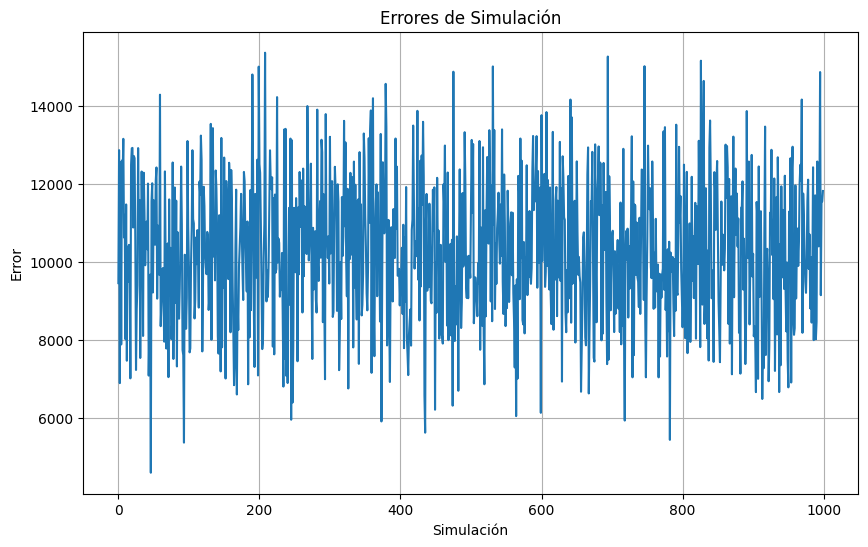

In [21]:
# Crear el gráfico de errores
errores = [result - presupuesto_maximo for result in resultados_presupuesto]
plt.figure(figsize=(10, 6))
plt.plot(errores)
plt.xlabel('Simulación')
plt.ylabel('Error')
plt.title('Errores de Simulación')
plt.grid(True)

# Mostrar el gráfico de errores
plt.show()

## Grafico de la Simulacion

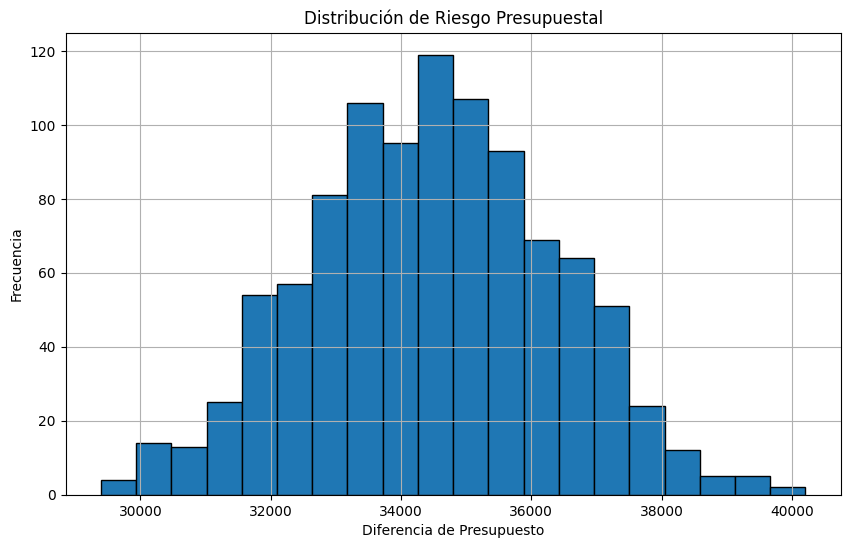

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(resultados_presupuesto, bins=20, edgecolor='black')
plt.xlabel('Diferencia de Presupuesto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Riesgo Presupuestal')
plt.grid(True)

plt.show()


In [ ]:
import plotly.express as px
fig = px.histogram(resultados_presupuesto, nbins=20, labels={'value': 'Diferencia de Presupuesto', 'count': 'Frecuencia'})
fig.update_layout(title='Distribución de Riesgo Presupuestal', xaxis=dict(title='Diferencia de Presupuesto'), yaxis=dict(title='Frecuencia'))
fig.show()
